In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv(r"data_LR_train.csv")

In [3]:
train.columns

Index(['Tier', 'FICO', 'Term', 'Amount', 'Previous_Rate', 'Competition_rate',
       'Rate', 'Cost_Funds', 'Partner Bin', 'Car_Type_N', 'Car_Type_R',
       'Car_Type_U', 'Accept'],
      dtype='object')

In [4]:
test = pd.read_csv(r"data_LR_test.csv")

In [5]:
test.shape

(25000, 13)

In [6]:
train['Accept'].value_counts()

0    46697
1    13303
Name: Accept, dtype: int64

Percentage of those accepted is 13303/60000=22.17

Percentage of those have not accepted is 46697/60000=77.82

On the train data

In [7]:
X_train = train.iloc[:, :-1]
y_train = train['Accept']
print(X_train.head())
print(y_train.head())

   Tier  FICO  Term    Amount  Previous_Rate  Competition_rate  Rate  \
0     1   783    36  16378.00              0              3.69  3.69   
1     2   711    48  28322.00              0              5.49  4.89   
2     1   773    36   9500.00              0              3.99  3.99   
3     1   743    72  24078.00              5              6.09  4.69   
4     1   762    72  14999.99              0              5.75  5.69   

   Cost_Funds  Partner Bin  Car_Type_N  Car_Type_R  Car_Type_U  
0      1.1200            1           1           0           0  
1      1.8200            1           1           0           0  
2      1.1100            3           1           0           0  
3      1.1100            1           0           1           0  
4      1.1463            3           0           0           1  
0    0
1    0
2    0
3    0
4    0
Name: Accept, dtype: int64


Loan will not be taken to be treated positive.   So, interchange 0 and 1 in y

In [8]:
y_train_new = np.zeros((60000, 1))
y_train_new[np.where(y_train.to_numpy()==1)] = 0
y_train_new[np.where(y_train.to_numpy()==0)] = 1

In [9]:
pd.concat((X_train, pd.DataFrame(y_train, columns=['Accept'])), axis=1)

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U,Accept
0,1,783,36,16378.00,0,3.69,3.69,1.1200,1,1,0,0,0
1,2,711,48,28322.00,0,5.49,4.89,1.8200,1,1,0,0,0
2,1,773,36,9500.00,0,3.99,3.99,1.1100,3,1,0,0,0
3,1,743,72,24078.00,5,6.09,4.69,1.1100,1,0,1,0,0
4,1,762,72,14999.99,0,5.75,5.69,1.1463,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1,733,48,9999.99,0,5.05,5.05,1.4200,3,0,0,1,0
59996,3,680,48,16125.00,10,5.29,7.54,1.1100,1,0,1,0,1
59997,1,772,48,40000.00,0,4.39,4.49,1.3200,1,1,0,0,0
59998,1,762,36,28000.00,0,3.49,3.49,1.1100,1,1,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


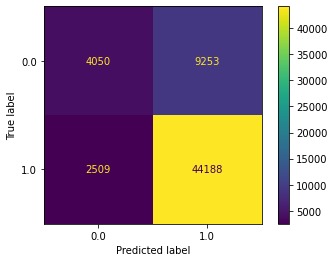

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(X_train, y_train_new)

ConfusionMatrixDisplay.from_predictions(y_train_new, lr.predict(X_train))

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_new)

data = pd.DataFrame(lr.coef_, columns=['Tier', 'FICO', 'Term', 'Amount', 'Previous_Rate', 'Competition_rate',
       'Rate', 'Cost_Funds', 'Partner Bin', 'Car_Type_N', 'Car_Type_R',
       'Car_Type_U']).T
data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
Tier,0.163439
FICO,-0.000254
Term,-0.051843
Amount,0.000118
Previous_Rate,-0.081194
Competition_rate,-0.035867
Rate,0.260553
Cost_Funds,0.008690
Partner Bin,0.109337
Car_Type_N,0.145460


On the Test data

In [12]:
X_test = test.iloc[:, :-1]
y_test = test['Accept']
print(X_test.head())
print(y_test.head())

   Tier  FICO  Term    Amount  Previous_Rate  Competition_rate   Rate  \
0     2   719    48  24000.00              0              4.29   4.35   
1     2   703    60  30000.00              0              4.39   4.35   
2     1   730    60  25000.00              0              4.25   4.49   
3     4   665    36  15000.00              0              4.45  10.09   
4     4   645    60  14999.99              0              5.15  10.95   

   Cost_Funds  Partner Bin  Car_Type_N  Car_Type_R  Car_Type_U  
0      1.2738            3           1           0           0  
1      1.3200            1           1           0           0  
2      1.1200            3           1           0           0  
3      1.1000            1           0           0           1  
4      1.6500            3           0           0           1  
0    0
1    0
2    0
3    0
4    0
Name: Accept, dtype: int64


"Loan not accepted" to be treated positive.   So, interchange 0 and 1 in y

In [13]:
y_test_new = np.zeros((25000, 1))
y_test_new[np.where(y_test.to_numpy()==1)] = 0
y_test_new[np.where(y_test.to_numpy()==0)] = 1

In [14]:
pd.concat((X_test, pd.DataFrame(y_test, columns=['Accept'])), axis=1)

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U,Accept
0,2,719,48,24000.00,0,4.29,4.35,1.2738,3,1,0,0,0
1,2,703,60,30000.00,0,4.39,4.35,1.3200,1,1,0,0,0
2,1,730,60,25000.00,0,4.25,4.49,1.1200,3,1,0,0,0
3,4,665,36,15000.00,0,4.45,10.09,1.1000,1,0,0,1,0
4,4,645,60,14999.99,0,5.15,10.95,1.6500,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,791,60,30000.00,0,4.49,4.49,1.2638,3,1,0,0,0
24996,1,802,36,30000.00,0,3.89,3.89,1.3200,3,1,0,0,0
24997,1,755,60,28000.00,0,4.29,4.29,1.1000,1,1,0,0,0
24998,2,716,60,5127.05,6,4.99,5.25,1.1000,1,0,1,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


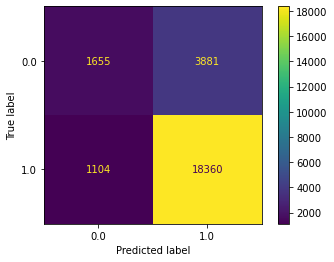

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(X_train, y_train_new) #who will not take the loan

ConfusionMatrixDisplay.from_predictions(y_test_new, lr.predict(X_test))

In [16]:
(18360+1655)/25000 # Accuracy on test data

0.8006

In [17]:
18360/(18360+3881) # Precision

0.8255024504293872

In [18]:
18360/(18360+1104) # Recall

0.9432799013563502

Q.13

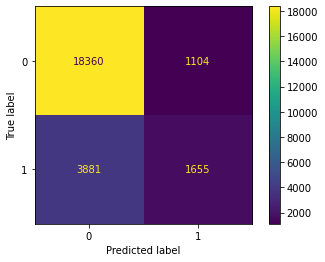

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(X_train, y_train) # who'll take the loan

ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test))

In [20]:
1655/(1655+1104) # Precision

0.599855019934759

In [21]:
1655/(1655+3881) # Recall

0.2989523121387283

Q.17

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


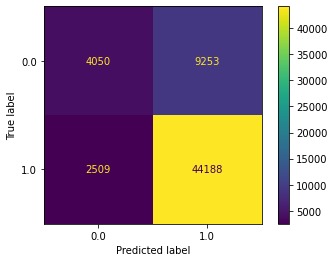

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(X_train, y_train_new) # who'll not take the loan

ConfusionMatrixDisplay.from_predictions(y_train_new, lr.predict(X_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


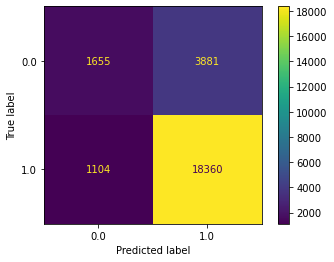

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(X_train, y_train_new) # who'll not take the loan

ConfusionMatrixDisplay.from_predictions(y_test_new, lr.predict(X_test))

In [24]:
(44188 + 4050)/60000 # accuracy on train data

0.8039666666666667

In [25]:
(18360 + 1655) / 25000 # accuracy on test data

0.8006

In [26]:
print(classification_report(y_test_new, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.60      0.30      0.40      5536
         1.0       0.83      0.94      0.88     19464

    accuracy                           0.80     25000
   macro avg       0.71      0.62      0.64     25000
weighted avg       0.78      0.80      0.77     25000

